<a href="https://colab.research.google.com/github/qamtam/Hands-on-machine-learning/blob/main/CH17_with_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.01))


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs = 20)
codings = encoder.predict(X_train)

Epoch 1/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2623
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2515
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2459
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2612
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.2464
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2415
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2389
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2368
Epoch 9/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2318
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2324
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2247
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2297
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

In [ ]:
#fashion_mnist

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5))

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255 #normalized to [0,1]
X_test = X_test.astype(np.float32) / 255 #normalized to [0,11]
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

history = stacked_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3814 - val_loss: 0.3166
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3083 - val_loss: 0.3021
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2997 - val_loss: 0.2982
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2959 - val_loss: 0.2938
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2928 - val_loss: 0.2920
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2920 - val_loss: 0.2915
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2899 - val_loss: 0.2906
Epoch 8/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2875 - val_loss: 0.2943
Epoch 9/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2878 - val_loss: 0.2906
Epoch 10/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.286

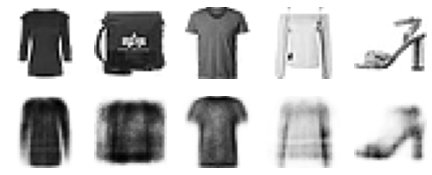

In [ ]:
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

def show_reconstructions(model, n_images=5):
  reconstructions = model.predict(X_valid[:n_images])
  fig = plt.figure(figsize=(n_images *1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plot_image(X_valid[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index) # second row
    plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)



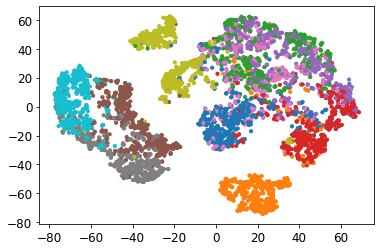

In [ ]:
from sklearn.manifold import TSNE
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")

w przypadku symetrycznych autoenkoderów można skopiować wagi dekodera z wag enkodera (powiązać je). przyspiesza to trening, zostają tylko dolne warstwy i środkowa. powiązanie wag wymaga transpozycji

In [ ]:
class DenseTranspose(keras.layers.Layer):
  def __init__(self, dense, activation = None, **kwargs):
    self.dense = dense #używamy konkretnej warstwy do operowania na niej potem
    self.activation = keras.activations.get(activation)
    super().__init__(**kwargs)
  def build(self, batch_input_shape):
    self.biases = self.add_weight(name="bias", initializer="zeros",
                                  shape =[self.dense.input_shape[-1]]) # nowe biasy
    super().build(batch_input_shape)
  def call(self, inputs):
    z = tf.matmul(inputs, self.dense.weights[0], transpose_b =True) #mnożymy inputy * wagi "warstwy z dołu"
    return self.activation(z + self.biases)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")
tied_encoder = keras.models.Sequential([
                                        keras.layers.Flatten(input_shape=[28,28]),
                                        dense_1,
                                        dense_2
])

tied_decoder = keras.models.Sequential([
                                        DenseTranspose(dense_2, activation="selu"),
                                        DenseTranspose(dense_1, activation="sigmoid"),
                                        keras.layers.Reshape([28,28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

In [ ]:
#variational autoencoder
K = tf.keras.backend
class Sampling(keras.layers.Layer):
  def call(self, inputs):
    mean, log_var = inputs
    return K.random_normal(tf.shape(log_var)) * K.exp(log_var/2) + mean #K.random_normal to już jakiś losowy wektor jednostkowy o kształcie wariancji i dopiero potem jest wyskalowany przez odch. stand. i dodana jest średnia


codings_size = 10
inputs = keras.layers.Input(shape=[28,28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z) # muddd
codings_log_var =  keras.layers.Dense(codings_size)(z) #gamma
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(inputs = [inputs], outputs = [codings_mean, codings_log_var, codings])



decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28*28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28,28])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1
)
# latent loss  puishes autoencoder to have final codings to look like they were sampled from batch (axis = -1) as though they were sampled
# from a simple gaussian distribution
variational_ae.add_loss(K.mean(latent_loss) /784.)
variational_ae.compile(loss= "binary_crossentropy", optimizer="rmsprop")
#history = variational_ae.fit(X_train, X_train, epochs=50, batch_size=128, validation_data = [X_valid, X_valid])

In [ ]:
variational_ae.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
model_6 (Functional)            [(None, 10), (None,  134870      input_5[0][0]                    
__________________________________________________________________________________________________
model_7 (Functional)            (None, 28, 28)       134634      model_6[0][2]                    
__________________________________________________________________________________________________
flatten_7 (Flatten)             (None, 784)          0           input_5[0][0]                    
____________________________________________________________________________________________

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 3s 5ms/step - loss: 0.4438 - val_loss: 0.3515
Epoch 2/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3461 - val_loss: 0.3412
Epoch 3/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3343 - val_loss: 0.3315
Epoch 4/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3290 - val_loss: 0.3293
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3254 - val_loss: 0.3271
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3242 - val_loss: 0.3242
Epoch 7/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3219 - val_loss: 0.3250
Epoch 8/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3195 - val_loss: 0.3240
Epoch 9/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3195 - val_loss: 0.3232
Epoch 10/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3178 - val_loss: 0.3244

In [ ]:
#generating new images

codings = tf.random.normal(shape=[12, codings_size]) #12*10, all you need is [Gauss] * 12 to make a reconstruction via decoder
images = variational_decoder(codings).numpy()

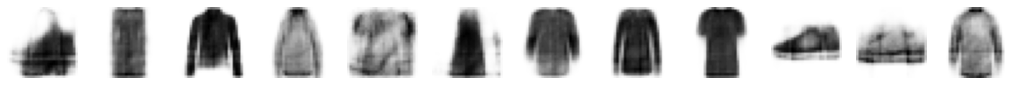

In [ ]:
fig = plt.figure(figsize=(12 *1.5, 3))
for image_index in range(12):
    plt.subplot(2, 12, 1 + image_index)
    plot_image(images[image_index])


In [ ]:
t = np.arange(1280).reshape(128,10)

In [ ]:
# we can interpolate images
# we can also interpolate from codings and then decode (resulting in a "in-between" clothing)

codings_grid = tf.reshape(codings, [1,3,4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5,7]) # interpolation in resize is the default
print(larger_grid.shape) # these are already the codings, but in a form of a table; we want just a row
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
print(interpolated_codings.shape)
images = variational_decoder(interpolated_codings).numpy()


(1, 5, 7, 10)
(35, 10)


In [ ]:
#gany

#idea prosta - tworzymy dwie sieci neuronowe pracujące w jednym szerszym systemie, zmuszamy ich do konkurowania
#konkurencja powinna ich zmusić do osiągania świetnych rezultatów

#simple gan for fashion mnist

codings_size = 30

generator = keras.models.Sequential([
                                     keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
                                     keras.layers.Dense(150, activation="selu"),
                                     keras.layers.Dense(28*28, activation="sigmoid"),
                                     keras.layers.Reshape([28,28]) # fake image
])

discriminator = keras.models.Sequential([
                                         keras.layers.Flatten(input_shape=[28,28]),
                                         keras.layers.Dense(150, activation="selu"),
                                         keras.layers.Dense(100, activation="selu"),
                                         keras.layers.Dense(1, activation = "sigmoid") # was the image true or fake?
])

gan = keras.models.Sequential([generator, discriminator])

# the discriminator should NOT be trained on second phase (we train generator then), so we make in untrainable for compilation
# generator is updated with whole gan anyway
# discriminator will be manipulated separately inside of the training loop
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
  generator, discrimnator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:
        
      # phase 1: train the discriminator SEPARATELY
      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real, y1)
      # phase 2: train the generator via the whole gan
      noise = tf.random.normal(shape=[batch_size, codings_size])
      y2 = tf.constant([[1.]] * batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y2)

#train_gan(gan, dataset, batch_size, codings_size)

In [ ]:
codings_size = 100
generator = keras.models.Sequential([
                                     keras.layers.Dense(7 * 7 * 128, input_shape = [codings_size]),
                                     keras.layers.Reshape([7, 7, 128]),
                                     keras.layers.BatchNormalization(),
                                     keras.layers.Conv2DTranspose(64, kernel_size = 5, strides =2, padding="same",activation="selu"), # 64 "pictures 14 * 14"
                                     keras.layers.BatchNormalization(),
                                     keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh") # 1 "picture 28*28"
])
discriminator = keras.models.Sequential([
                                         keras.layers.Conv2D(64, kernel_size=5, strides=5, padding="same", activation=keras.layers.LeakyReLU(0.2), input_shape=[28,28,1]),
                                         keras.layers.Dropout(0.4),
                                             keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
                                         keras.layers.Dropout(0.4),
                                         keras.layers.Flatten(),
                                         keras.layers.Dense(1, activation = "sigmoid")
])

gan= keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")
# będziemy korzystać ze wcześniejszej funkcji

In [ ]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)

NameError: ignored